In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Load the data
def loadData():
    with np.load('/content/drive/My Drive/ECE421/Assignment2/notMNIST.npz') as data:
        Data, Target = data["images"], data["labels"]
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx] / 255.0
        Target = Target[randIndx]
        trainData, trainTarget = Data[:10000], Target[:10000]
        validData, validTarget = Data[10000:16000], Target[10000:16000]
        testData, testTarget = Data[16000:], Target[16000:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


# Implementation of a neural network using only Numpy - trained using gradient descent with momentum
def convertOneHot(trainTarget, validTarget, testTarget):
    newtrain = np.zeros((trainTarget.shape[0], 10))
    newvalid = np.zeros((validTarget.shape[0], 10))
    newtest = np.zeros((testTarget.shape[0], 10))

    for item in range(0, trainTarget.shape[0]):
        newtrain[item][trainTarget[item]] = 1
    for item in range(0, validTarget.shape[0]):
        newvalid[item][validTarget[item]] = 1
    for item in range(0, testTarget.shape[0]):
        newtest[item][testTarget[item]] = 1
    return newtrain, newvalid, newtest


def shuffle(trainData, trainTarget):
    np.random.seed(421)
    randIndx = np.arange(len(trainData))
    target = trainTarget
    np.random.shuffle(randIndx)
    data, target = trainData[randIndx], target[randIndx]
    return data, target


def relu(x):
    return np.maximum(x,0)

def softmax(x):
    x = x - np.amax(x, axis=1, keepdims=True)
    return np.exp(x)/(np.sum(np.exp(x), axis=1, keepdims=True))


def computeLayer(X, W, b):
    return np.matmul(X,W)+b


def CE(target, prediction):
    return (-1/target.shape[0])*np.sum(target*np.log(prediction))


def gradCE(target, prediction):
    return (softmax(prediction) - target)/target.shape[0]

In [59]:
def backprop(xi, xh, w, target, prediction):
  gradce = gradCE(target, prediction)
  dwo = np.matmul(np.transpose(xh),gradce) #10000,1000  100000,10
  dbo = np.transpose(sum(gradce)).reshape(1, 10)
  dwh = np.matmul(np.transpose(xi),np.where(xh > 0, 1, 0)*np.matmul(gradce,np.transpose(w)))
  dbh = sum(np.where(xh > 0, 1, 0) * np.dot(gradce, np.transpose(w))).reshape(1, 1000)
  return dwo,dbo,dwh,dbh

epoch 0 : accuracy =  0.1069
epoch 1 : accuracy =  0.3023
epoch 2 : accuracy =  0.4296
epoch 3 : accuracy =  0.5706
epoch 4 : accuracy =  0.6585
epoch 5 : accuracy =  0.7364
epoch 6 : accuracy =  0.8164
epoch 7 : accuracy =  0.8276
epoch 8 : accuracy =  0.8425
epoch 9 : accuracy =  0.8338
epoch 10 : accuracy =  0.8415
epoch 11 : accuracy =  0.8574
epoch 12 : accuracy =  0.8645
epoch 13 : accuracy =  0.8665
epoch 14 : accuracy =  0.8648
epoch 15 : accuracy =  0.8661
epoch 16 : accuracy =  0.8792
epoch 17 : accuracy =  0.8837
epoch 18 : accuracy =  0.8843
epoch 19 : accuracy =  0.8845
epoch 20 : accuracy =  0.8836
epoch 21 : accuracy =  0.8828
epoch 22 : accuracy =  0.8853
epoch 23 : accuracy =  0.8894
epoch 24 : accuracy =  0.895
epoch 25 : accuracy =  0.8959
epoch 26 : accuracy =  0.897
epoch 27 : accuracy =  0.8969
epoch 28 : accuracy =  0.8978
epoch 29 : accuracy =  0.9012
epoch 30 : accuracy =  0.903
epoch 31 : accuracy =  0.9034
epoch 32 : accuracy =  0.9042
epoch 33 : accuracy =  

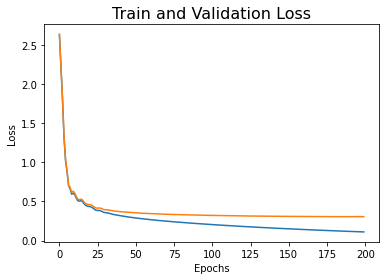

[0.1069, 0.3023, 0.4296, 0.5706, 0.6585, 0.7364, 0.8164, 0.8276, 0.8425, 0.8338, 0.8415, 0.8574, 0.8645, 0.8665, 0.8648, 0.8661, 0.8792, 0.8837, 0.8843, 0.8845, 0.8836, 0.8828, 0.8853, 0.8894, 0.895, 0.8959, 0.897, 0.8969, 0.8978, 0.9012, 0.903, 0.9034, 0.9042, 0.904, 0.9048, 0.9057, 0.9063, 0.9089, 0.9102, 0.9103, 0.9113, 0.9122, 0.9128, 0.9126, 0.9138, 0.9144, 0.915, 0.9155, 0.9162, 0.9172, 0.9182, 0.9185, 0.9198, 0.9208, 0.922, 0.9224, 0.9234, 0.9244, 0.924, 0.9253, 0.9255, 0.9258, 0.9268, 0.9275, 0.9283, 0.9285, 0.929, 0.9292, 0.9296, 0.9308, 0.9314, 0.9321, 0.9321, 0.9325, 0.9329, 0.9336, 0.9337, 0.934, 0.9347, 0.935, 0.9356, 0.9358, 0.9363, 0.9367, 0.9372, 0.9373, 0.9377, 0.9383, 0.9385, 0.9387, 0.939, 0.9392, 0.9397, 0.9399, 0.9403, 0.9407, 0.9409, 0.9414, 0.9417, 0.9421, 0.9426, 0.943, 0.9436, 0.9441, 0.9443, 0.9446, 0.945, 0.9451, 0.9454, 0.9456, 0.9462, 0.9466, 0.9473, 0.9478, 0.9481, 0.9487, 0.9498, 0.9503, 0.9508, 0.9512, 0.9515, 0.9521, 0.9522, 0.9525, 0.9529, 0.9531, 0.95

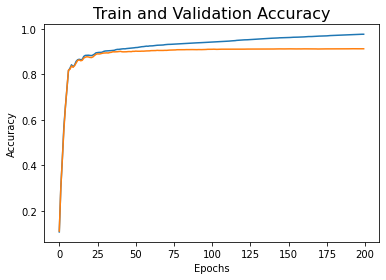

In [60]:
def learning():
  trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
  trainData = trainData.reshape((trainData.shape[0], -1))
  validData = validData.reshape((validData.shape[0], -1))
  testData = testData.reshape((testData.shape[0], -1))
  newtrain, newvalid, newtest = convertOneHot(trainTarget, validTarget, testTarget)

  epoch=200
  H=1000
  F=trainData.shape[1]
  gamma=0.9
  alpha=0.1
  xi = trainData
  wo = np.random.normal(0, np.sqrt(2/(H+10)), (H,10))
  wh = np.random.normal(0, np.sqrt(2/(F+H)), (F,H))
  bo = np.zeros((1,10))
  bh = np.zeros((1,H))
  train_loss = []
  valid_loss = []
  train_acc = []
  valid_acc = []
  test_acc = []

  dwh = np.zeros((F,H))
  dwo = np.zeros((H,10))
  dbh = np.zeros((1,H))
  dbo = np.zeros((1,10))

  vwh = np.full((F,H),1e-5)
  vwo = np.full((H,10),1e-5)
  vbh = np.full((1,H),1e-5)
  vbo = np.full((1,10),1e-5)

  sh = np.zeros((10000,1000))
  so = np.zeros((10000,10))
  sh_ = np.zeros((6000,1000))
  so_ = np.zeros((6000,10))
  for i in range(epoch):
    
    sh = computeLayer(xi, wh, bh)
    xh = relu(sh)
    so = computeLayer(xh, wo, bo)
    yo = softmax(so)    
    train_loss.append(CE(newtrain,yo))
    compare = np.equal(np.argmax(yo,axis=1),np.argmax(newtrain,axis=1))
    train_accuracy = np.sum((compare==True))/(trainData.shape[0])
    train_acc.append(train_accuracy)
    print("epoch", i, ": accuracy = ",train_accuracy)

    sh_ = computeLayer(validData, wh, bh)
    xh_ = relu(sh_)
    so_ = computeLayer(xh_, wo, bo)
    valid_pre = softmax(so_)
    valid_loss.append(CE(newvalid,valid_pre))
    compare_valid = np.equal(np.argmax(valid_pre,axis=1),np.argmax(newvalid,axis=1))
    valid_accuracy = np.sum((compare_valid==True))/(validData.shape[0])
    valid_acc.append(valid_accuracy)
    dwo,dbo,dwh,dbh = backprop(xi, xh, wo, newtrain, so)

    if (i==epoch-1):
      print("train_acc is",train_accuracy)
      print("train_loss is",train_loss)
      print("valid_acc is",valid_accuracy)
      print("valid_loss is",valid_loss)

    vwh = gamma*vwh + alpha*dwh
    vwo = gamma*vwo + alpha*dwo
    vbh = gamma*vbh + alpha*dbh
    vbo = gamma*vbo + alpha*dbo
    wo = wo - vwo
    wh = wh - vwh
    bo = bo - vbo
    bh = bh - vbh
    
      
  plt.plot(range(epoch),train_loss)
  plt.plot(range(epoch),valid_loss)
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.title('Train and Validation Loss', fontsize=16)
  plt.show()

  print(train_acc)
  plt.plot(range(epoch),train_acc)
  plt.plot(range(epoch),valid_acc)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.title('Train and Validation Accuracy', fontsize=16)
  plt.show()

learning()